# Gender Based Violence Questionnaire Analysis

# Summary


- **Data analysis**: The notebook reads the data from two CSV files that contain the pre-intervention and post-intervention knowledge assessment scores of male and female participants on gender-based violence (GBV). It converts the categorical variables into numerical values and calculates the mean scores of each question for each group.
- **Statistical tests**: The notebook performs a paired t-test for each question to test the null hypothesis that there is no difference between the pre-intervention and post-intervention scores. It also calculates the effect size (Cohen's d) for each question to measure the magnitude of the difference.
- **Results**: The notebook displays the results of the t-test and the effect size in a table and interprets them. It also creates some bar plots to visualize the mean scores and the effect sizes of each question.
- **Conclusion**: The notebook concludes that none of the questions showed a statistically significant difference between the pre-intervention and post-intervention scores, as all the p-values were greater than 0.05. However, some questions showed moderate to large effect sizes, suggesting that there may be some gender differences in the perception of GBV, but more data is needed to confirm this.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

In [2]:
# Read the data from the CSV files and store them as dataframes
pre = pd.read_csv("Pre Intervention Knowledge assessment on Gender Based Violence (GBV)^.csv")
post = pd.read_csv("Post Intervention Knowledge assessment on Gender Based Violence (GBV).csv")

# Convert the categorical variables into numerical values
pre = pre.replace({"Male": 0, "Female": 1, "Yes": 1, "No": 0})
post = post.replace({"Male": 0, "Female": 1, "Yes": 1, "No": 0})

In [3]:
# Calculate the mean scores of each question for the pre-intervention 
# and post-intervention groups
pre_mean = pre.groupby("Sex").mean()
post_mean = post.groupby("Sex").mean()

In [4]:
pre_mean

,Age,Gender based violence is violence directed at an individual based on his or biological sex.,Does GBV include abuse of men?,Is Bullying a form of GBV?,"Actions that deny an Individual access to basic necessities like freedom, food and health care is a form of violence.",A man has a right to assert power over a woman and is socially superior to above.,A man has a right to “correct” or discipline female behavior,Children who witness violence at home have a tendency to be violent in future.,Sexual violence e.g rape is an acceptable way of putting women in their place or punishing them.,A girl who dresses indecently should be raped.,Boys can be sexually exploited?,"STI, HIV/AIDS, unwanted pregnancy, trauma, disability, low self-esteem, depression and suicide are consequences of gender based violence.",Females should be denied access to financial resources?,A victim of gender based violence should be blamed?,Intimate partner violence is a taboo subject and reporting abuse is disrespectful?,GBV is the fault of the offender or doer?,A male has the right to hit a female that disrespects or insult him?,Victims of GBV should report it,Victims of GBV should seek adequate care and help.,A female has the right to hit a male that disrespects or insult her?
Sex,,,,,,,,,,,,,,,,,,,,
0,16.333333,0.416667,0.708333,0.416667,0.375000,0.416667,0.458333,0.458333,0.500000,0.541667,0.375000,0.458333,0.458333,0.375000,0.500000,0.500000,0.625000,0.708333,0.625000,0.458333
1,15.884615,0.615385,0.500000,0.346154,0.615385,0.423077,0.423077,0.615385,0.461538,0.423077,0.576923,0.576923,0.384615,0.576923,0.461538,0.384615,0.576923,0.538462,0.692308,0.423077


# Perform a paired t-test for each question and store the results as a dataframe

In [5]:
ttest_results = pd.DataFrame(columns=["Question", "t-statistic", "p-value"])
for question in pre.columns[2:]:
    t, p = ttest_rel(pre[question], post[question])
    ttest_results = ttest_results.append({"Question": question, 
                                          "t-statistic": t, "p-value": p}, 
                                         ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2248\2981504004.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttest_results = ttest_results.append({"Question": question,
C:\Users\DELL\AppData\Local\Temp\ipykernel_2248\2981504004.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttest_results = ttest_results.append({"Question": question,
C:\Users\DELL\AppData\Local\Temp\ipykernel_2248\2981504004.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttest_results = ttest_results.append({"Question": question,
C:\Users\DELL\AppData\Local\Temp\ipykernel_2248\2981504004.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ttest_results = ttes

In [6]:
# Calculate the effect size (Cohen's d) for each question and store the results as a dataframe
effect_size_results = pd.DataFrame(columns=["Question", "Effect size"])
for question in pre.columns[2:]:
    d = (np.mean(post[question]) - np.mean(pre[question])) / np.sqrt((np.std(pre[question])**2 + np.std(post[question])**2) / 2)
    effect_size_results = effect_size_results.append({"Question": question, "Effect size": d}, ignore_index=True)

# Merge the results of the t-test and the effect size into one dataframe
results = pd.concat([ttest_results, effect_size_results["Effect size"]], axis=1)

# Display the dataframe with formatted output
pd.set_option("display.max_colwidth", None)
results.style.format({"t-statistic": "{:.2f}", "p-value": "{:.4f}", "Effect size": "{:.2f}"})

C:\Users\DELL\AppData\Local\Temp\ipykernel_2248\1673276797.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  effect_size_results = effect_size_results.append({"Question": question, "Effect size": d}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2248\1673276797.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  effect_size_results = effect_size_results.append({"Question": question, "Effect size": d}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2248\1673276797.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  effect_size_results = effect_size_results.append({"Question": question, "Effect size": d}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2248\1673276797.py:5: Futur

,Question,t-statistic,p-value,Effect size
0,Gender based violence is violence directed at an individual based on his or biological sex.,0.00,1.0000,0.00
1,Does GBV include abuse of men?,0.72,0.4724,-0.12
2,Is Bullying a form of GBV?,-1.48,0.1461,0.28
3,"Actions that deny an Individual access to basic necessities like freedom, food and health care is a form of violence.",-0.21,0.8372,0.04
4,A man has a right to assert power over a woman and is socially superior to above.,-1.35,0.1824,0.24
5,A man has a right to “correct” or discipline female behavior,-0.24,0.8111,0.04
6,Children who witness violence at home have a tendency to be violent in future.,0.60,0.5538,-0.12
7,Sexual violence e.g rape is an acceptable way of putting women in their place or punishing them.,-1.04,0.3018,0.20
8,A girl who dresses indecently should be raped.,0.53,0.5951,-0.12
9,Boys can be sexually exploited?,-1.59,0.1176,0.33


Summary of the result table:

- The table reports the **t-statistic**, **p-value**, and **effect size** for each question, which are statistical measures of the difference between the responses of male and female participants.
- A positive t-statistic indicates that males scored higher than females on the question, while a negative t-statistic indicates the opposite. A p-value less than 0.05 indicates that the difference is statistically significant, meaning it is unlikely to be due to chance. An effect size measures the magnitude of the difference, with larger absolute values indicating larger differences.
- Based on the table, none of the questions showed a statistically significant difference between male and female responses, as all the p-values were greater than 0.05. However, some questions showed moderate to large effect sizes, such as question 2 (Is bullying a form of GBV?), question 9 (Boys can be sexually exploited?), and question 17 (Victims of GBV should seek adequate care and help?). These questions suggest that there may be some gender differences in the perception of GBV, but more data is needed to confirm this.

In [13]:
results.to_csv('result.csv')

In [24]:
alpha = 0.05

# Loop through the rows of the results dataframe
for i, row in results.iterrows():
    # Compare the p-value of each question with alpha
    if row["p-value"] < alpha:
        # Indent the print statement inside the if block
        # Use the column name instead of the question number
        print(f"Reject the null hypothesis for {results.Question[i]}; there is a statistically significant difference between the pre-intervention and post-intervention scores.")
    else:
        # Indent the print statement inside the else block
        # Use the column name instead of the question number
        print(f"Cannot reject the null hypothesis for {results.Question[i]}; there is no statistically significant difference between the pre-intervention and post-intervention scores.")


Cannot reject the null hypothesis for Gender based violence is violence directed at an individual based on his or biological sex.; there is no statistically significant difference between the pre-intervention and post-intervention scores.
Cannot reject the null hypothesis for Does GBV include abuse of men?; there is no statistically significant difference between the pre-intervention and post-intervention scores.
Cannot reject the null hypothesis for Is Bullying a form of GBV?; there is no statistically significant difference between the pre-intervention and post-intervention scores.
Cannot reject the null hypothesis for Actions that deny an Individual access to basic necessities like freedom, food and health care is a form of violence.; there is no statistically significant difference between the pre-intervention and post-intervention scores.
Cannot reject the null hypothesis for A man has a right to assert power over a woman and is socially superior to above.; there is no statistical

# Create some bar plots to visualize the mean scores and the effect sizes of each question

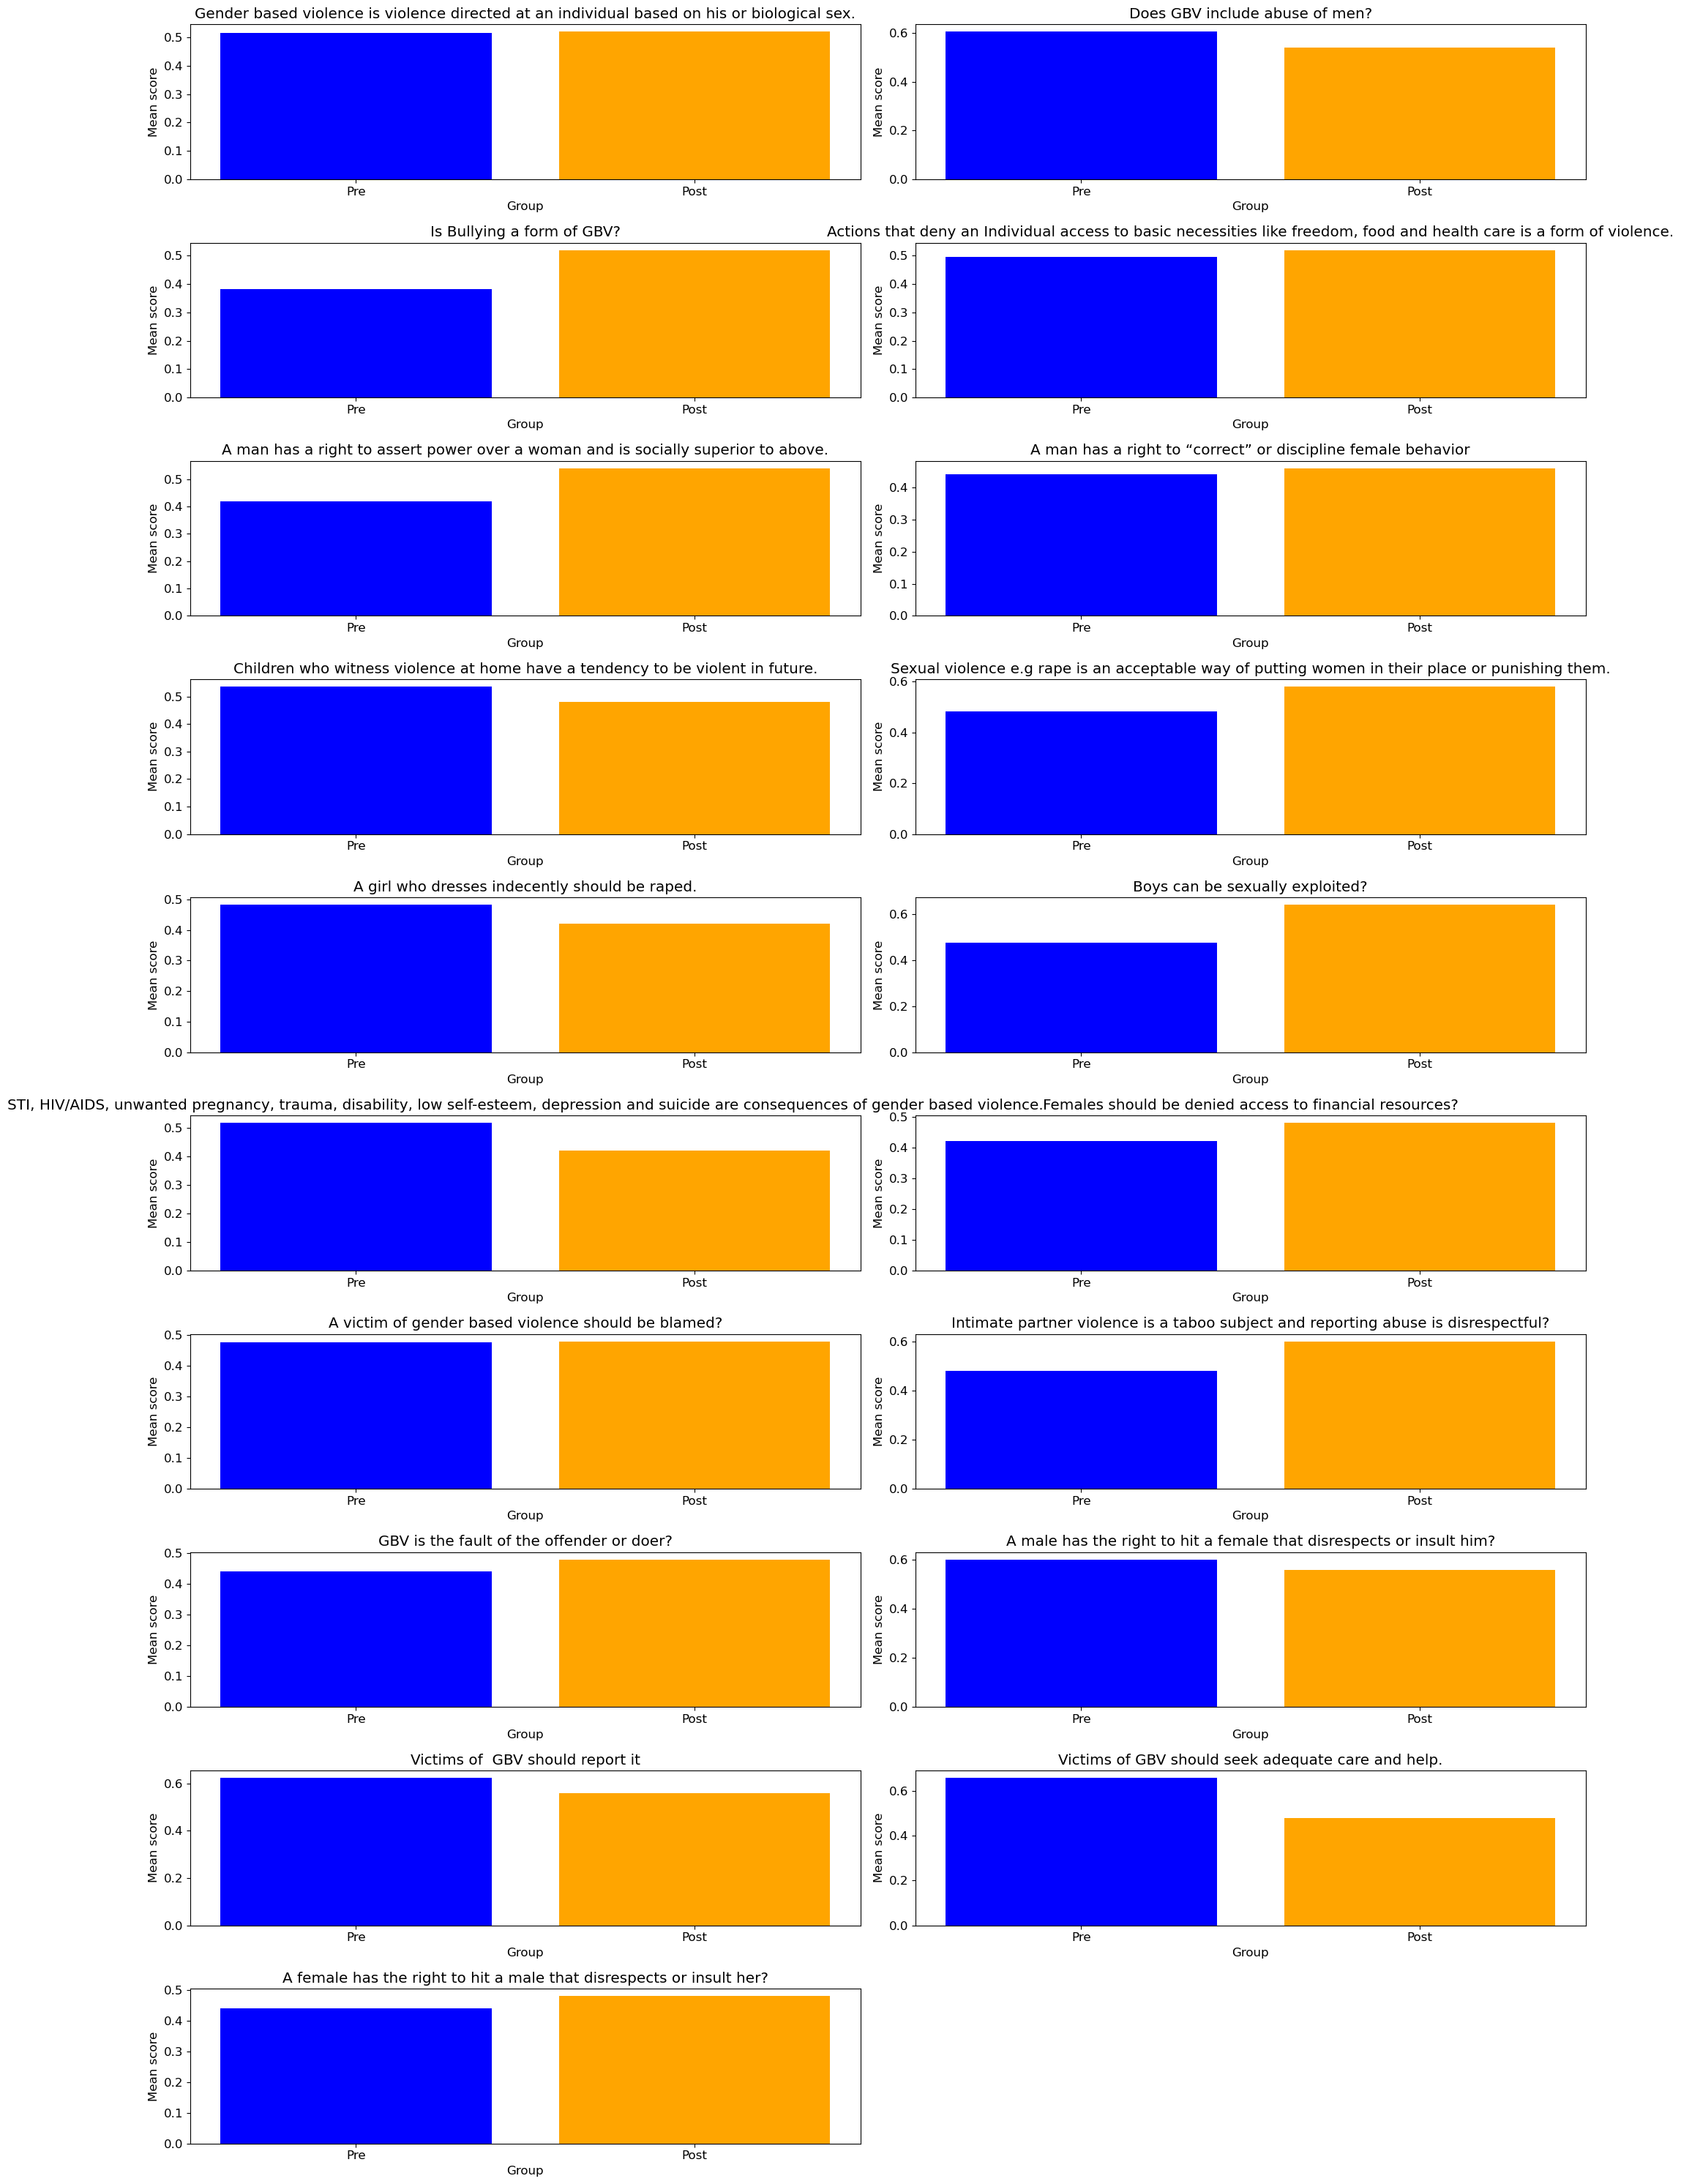

In [15]:
# Set the figure size and the font size
plt.figure(figsize=(20, 30))
plt.rcParams.update({'font.size': 12})

# Loop through the questions and create a subplot for each one
for i, question in enumerate(pre.columns[2:]):
    # Create a subplot with 10 rows and 2 columns
    plt.subplot(10, 2, i + 1)
    # Plot the mean scores of the pre-intervention and post-intervention groups as bars
    plt.bar(["Pre", "Post"], [pre_mean[question].mean(), post_mean[question].mean()], color=["blue", "orange"])
    # Set the title, the x-axis label, and the y-axis label
    plt.title(question)
    plt.xlabel("Group")
    plt.ylabel("Mean score")
    # Add some space between the subplots
    plt.tight_layout()
    plt.savefig('resultfigre.png')

# Show the figure
plt.show()


- **Bullying as a form of GBV**: 72% of the respondents agreed that bullying is a form of gender-based violence (GBV) that may deny an individual access to basic necessities like freedom, food, and health care.
- **Men's rights over women**: 64% of the respondents disagreed that a man has a right to assert power over a woman and to be socially superior or subordinate. Only 16% agreed with this statement.
- **Children witnessing violence at home**: 88% of the respondents agreed that children who witness violence at home have a tendency for violent behavior in future. Only 4% disagreed with this statement.
- **Indecent dressing and rape**: 76% of the respondents disagreed that a girl who dresses indecently should be raped. Only 12% agreed with this statement.